<div dir=rtl>
    
## מעבדה לפיסיקה 2
# אלקטרון בשדות
<div dir=rtl>
תיעוד ניסוי "אלקטרון בשדות"<br>

<div dir=rtl>
<font color='red'>אין קובץ עזר זה מחליף את תדריך הניסוי! למהלך הניסוי, יש לפנות לתדריך הניסוי!</font>
    
    גרסה 0.2
***
<div dir=rtl>
תאריך:
<div dir=rtl>  
עמדה:
<div dir=rtl>
מבצעים/ות:



***
<div dir=rtl> <b> הערות: </b> <br>
.
.
.
.
    


<div dir=rtl>

### ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות

In [5]:
import numpy as np  # math functions
import matplotlib.pyplot as plt  # for plotting figures and setting their properties
from scipy.stats import linregress  # linear regression
import scipy.constants as spc  #Scientific constants
from scipy.odr import ODR, Model, RealData

<div dir=rtl>
<h1>
    מהלך הניסוי 
<a id="hathala"></a>
</h1>

<div dir=rtl>
<h3>
    בדיקת איפוס 
</h3>
בדקו אם האלומה מאופסת בהעדר שדות (במרחק של פחות מ1-ממ מהציר האופקי). אם לא, יש ליישם תיקון איפוס (ראו משוואה (14)).

<div dir=rtl>
הסבר: </br>
.
.
.

In [6]:
# If need be, create a function for the correction here and apply to the data later
# Zero correction function:


<div dir=rtl>
<h3>
    ניסוי שדה מגנטי (B experiment) 
</h3>
<div dir=rtl>
בחרו זוגות של מתח האצה ($U_A$) , זרם ($I$) ונקודה לאורך המסלול  של אלומת האלקטרונים (ראו משוואה (4) בשביל חילוץ הרדיוס) בשביל להעריך את יחס מסה-מטען של האלקטרון מתוך משוואה (6). </br>
לא לשכוח הערכת שגיאה לכל מדידה בשביל הממוצע הממושקל וקווי השגיאה!

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> נוח לבחור נקודת חיתוך של קווי הרשת בשביל המדידה 
</div>

NameError: name 'intercept' is not defined

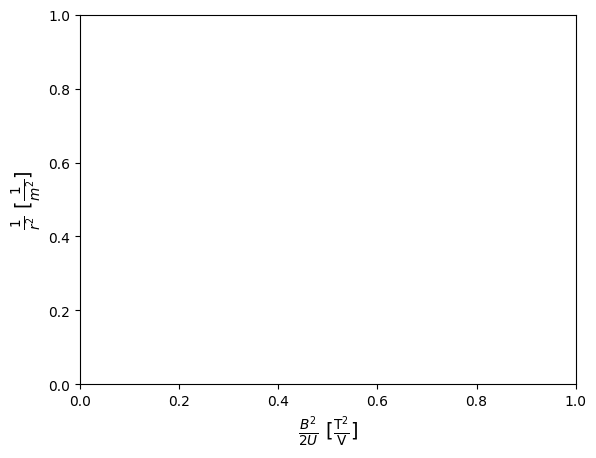

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
acceleration_voltages = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4.8, 4, 2.6, 1.5, 1.3, 2, 3.4, 3.1, 3.6, 3.9]) * 1000
acceleration_voltages_err = np.maximum(0.03 * acceleration_voltages, np.array([50] * len(acceleration_voltages)))
current = np.array(
    [.252, .160, .096, .2, .264, .304, .539, .697, .798, .399, -.3, -.3, -.3, -.3, -.3, -.35, -.35, -.35, -.35, -.38])
current_err = (0.005 * np.abs(current) + 0.005)  # absolute to avoid negative errors
b_grid_x = np.array([9, 8, 8, 7, 6, 7, 5, 5, 4, 7, 6, 7, 5, 6, 5, 6, 5, 6, 4, 5]) / 100
b_grid_y = np.array([2, 1, .5, 1, 1, 1.5, 1.5, 2, 1.5, 2, -1, -1.5, -1, -2, -1.5, -2, -1, -1.5, -.5, -1]) / 100
b_grid_err = 0.2 / 100

# Calculated quantities
radius = (b_grid_x ** 2 + b_grid_y ** 2) / np.abs(2 * b_grid_y)
radius_err = b_grid_err * np.hypot(
    2 * b_grid_x / (2 * b_grid_y),  # ∂r/∂x
    (- (b_grid_x ** 2 + b_grid_y ** 2)) / (2 * b_grid_y ** 2)  # ∂r/∂y
)

k2 = ((.8 ** 1.5) * 1.255e-6) * 320 / (6.7 / 100)
magnetic_field = k2 * current
magnetic_field_err = k2 * current_err

x_axis = magnetic_field ** 2 / (2 * acceleration_voltages)
x_axis_err = x_axis * np.hypot(
    2 * magnetic_field_err / magnetic_field,
    acceleration_voltages_err / acceleration_voltages
)

y_axis = 1 / radius ** 2
y_axis_err = np.abs(2 * radius_err / radius ** 3)

plt.xlabel(r'$\frac{B^2}{2U}\ [\frac{\text{T}^2}{\text{V}}]$', fontsize=14)
plt.ylabel(r'$\frac{1}{r^2}\ [\frac{1}{m^2}]$', fontsize=14)

# Format intercept and error in scientific notation parts
intercept_str = (
    rf"{f'{intercept:.3e}'.split('e')[0]} \cdot 10^{{{int(f'{intercept:.3e}'.split('e')[1])}}}"
    rf" \pm "
    rf"{f'{intercept_err:.3e}'.split('e')[0]} \cdot 10^{{{int(f'{intercept_err:.3e}'.split('e')[1])}}}"
)

plt.annotate(
    rf'$R_{{RT}} = {intercept_str}\ \Omega$',
    xy=(x[0], intercept),  # use x data array for horizontal position
    xytext=(0.13, 0.6),
    textcoords="axes fraction",
    arrowprops=dict(
        arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
        color="goldenrod",
        connectionstyle="arc3,rad=0.15"
    ),
    fontsize=11,
    color="darkgoldenrod",
    bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
    zorder=5
)


plt.errorbar(x_axis, y_axis, yerr=y_axis_err, xerr=x_axis_err, fmt='o', ecolor='gray', capsize=3, label='Data')
plt.xlabel(r'$\frac{B^2}{2U}\ [\frac{\text{T}^2}{\text{V}}]$', fontsize=14)
plt.ylabel(r'$\frac{1}{r^2}\ [\frac{1}{m^2}]$', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם ערך היחס מסה-מטען של האלקטרון קרוב לספרותי?
</div>

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> מה מקור השגיאה העיקרי בחלק זה? כיצד אפשר לשפר את התוצאה?
</div>

<div dir=rtl>
<h3>
    ניסוי ווין (Wien experiment) 
</h3>
<div dir=rtl>
בחרו שלשות של מתח האצה ($U_A$) , זרם ($I$) ומתח הסחה ($U_P$) בשביל לקבל אלומה קרובה ככל האפשר לציר האופקי - בשביל להעריך את יחס מסה-מטען של האלקטרון מתוך משוואה (13). </br>
לא לשכוח הערכת שגיאה לכל מדידה בשביל הממוצע הממושקל!

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> נוח לקבע את אחד המשתנים ולשנות את השאר, ואז להחליף ביניהם. 
</div>

In [4]:
# Wien measurements:
wien_acceleration_voltage = np.array([2.1, 4.3, 3.9, 4, 5, 5, 3, 5, 5, 4.4]) * 1000
wien_deflection_voltage = np.array([.4, 1.7, 2, 2, 2.5, 3, 2.5, 3.5, .5, 1.7]) * 1000
wien_current = np.array([.046, .159, .195, .207, .229, .258, .293, .329, .028, .143])
# In higher acceleration voltages, the beam was more linear
k1 = .75
d = 5.5 / 100
1 / (2 * wien_acceleration_voltage) * ((k1 * wien_deflection_voltage) / (k2 * wien_current * d)) ** 2
# i = 10
# wien_acceleration_voltage[i], wien_deflection_voltage[i], wien_current[i]

array([1.81755821e+11, 1.34195652e+11, 1.36153706e+11, 1.17804699e+11,
       1.20321255e+11, 1.36501178e+11, 1.22497387e+11, 1.14255626e+11,
       3.21926884e+11, 1.62134858e+11])

[חזרה לתחילת מהלך הניסוי](#hathala)

<div dir=rtl>
<h3>
    דיון דיווח ומסקנות
</h3>

<div dir=rtl>
<h3>
    מדידות נוספות 
</h3>
- האם תוכלו לחלץ את ערכו של 
    $k_1$ 
    בעצמכם? (ראו משוואה (10)) 

<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> האם כל הקבצים (קבצי מדידות (csv), קבצי עיבוד, תמונות...) הועלו למודל?
</div>